In [1]:
import requests
import pandas as pd
import os
import matplotlib.pyplot as plt
import squarify
from dotenv import load_dotenv

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# .env 파일 로드
load_dotenv()

# 환경변수에서 파일 경로 가져오기
file_path1 = os.getenv("File_path1")  # 경기/인천 (Excel)
file_path2 = os.getenv("File_path2")  # 서울 (CSV)

# ✅ 데이터 불러오기
df_gi = pd.read_excel(file_path1)   # 경기·인천
df_seoul = pd.read_csv(file_path2)  # 서울

# ✅ 서울 데이터 컬럼 정리
df_seoul = df_seoul.rename(columns={'createdtime': '등록일'})
df_seoul['등록일'] = pd.to_datetime(df_seoul['등록일'].astype(str), format='%Y%m%d%H%M%S', errors='coerce')
df_seoul['지역'] = '서울'

# ✅ 경기/인천 데이터 정리
df_gi['등록일'] = pd.to_datetime(df_gi['등록일'].astype(str), format='%Y%m%d%H%M%S', errors='coerce')
df_gi['지역'] = '경기/인천'

# ✅ 연도 컬럼 추가
df_seoul['연도'] = df_seoul['등록일'].dt.year
df_gi['연도'] = df_gi['등록일'].dt.year

# ✅ 전체 데이터 통합
df_all = pd.concat([df_seoul, df_gi], ignore_index=True)
df_all['연도'] = df_all['등록일'].dt.year

# ✅ 연도별 등록 수 집계
counts_seoul = df_seoul['연도'].value_counts().sort_index()
counts_gi = df_gi['연도'].value_counts().sort_index()
counts_total = df_all['연도'].value_counts().sort_index()


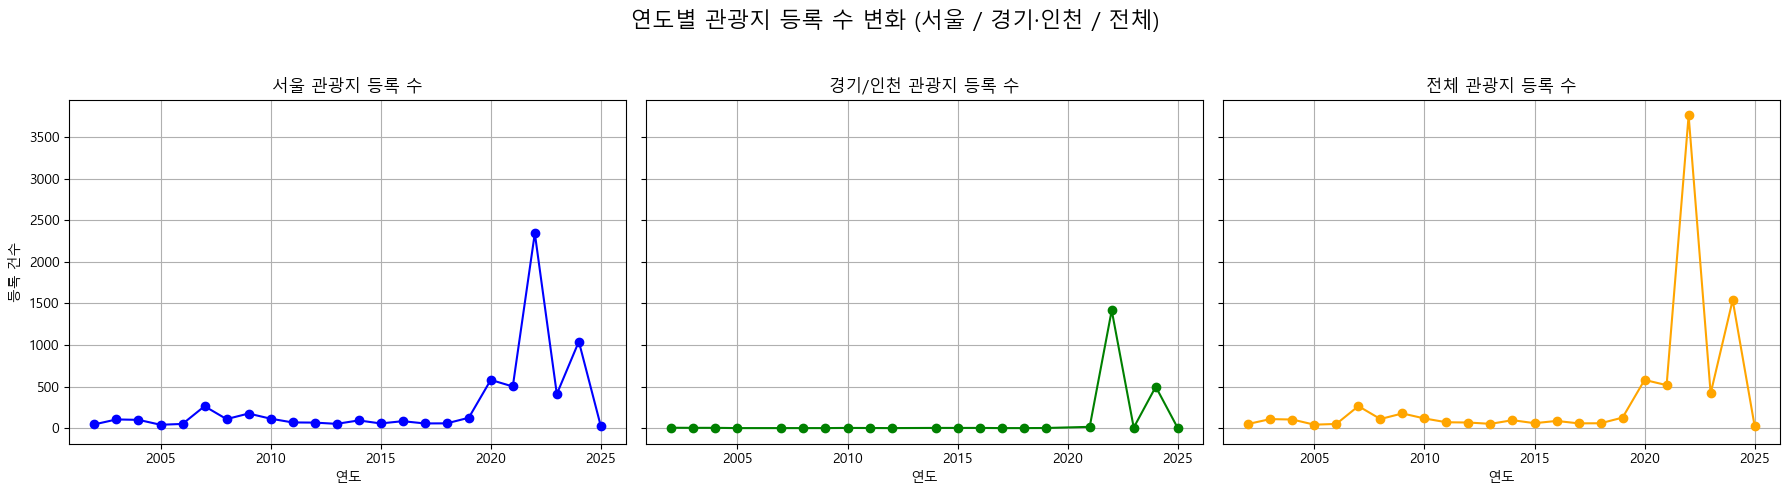

In [2]:
# ✅ 시각화 (subplot 가로 배치)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# 서울
axes[0].plot(counts_seoul.index, counts_seoul.values, marker='o', color='blue')
axes[0].set_title('서울 관광지 등록 수')
axes[0].set_xlabel('연도')
axes[0].set_ylabel('등록 건수')
axes[0].grid(True)

# 경기/인천
axes[1].plot(counts_gi.index, counts_gi.values, marker='o', color='green')
axes[1].set_title('경기/인천 관광지 등록 수')
axes[1].set_xlabel('연도')
axes[1].grid(True)

# 전체
axes[2].plot(counts_total.index, counts_total.values, marker='o', color='orange')
axes[2].set_title('전체 관광지 등록 수')
axes[2].set_xlabel('연도')
axes[2].grid(True)

plt.suptitle('연도별 관광지 등록 수 변화 (서울 / 경기·인천 / 전체)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

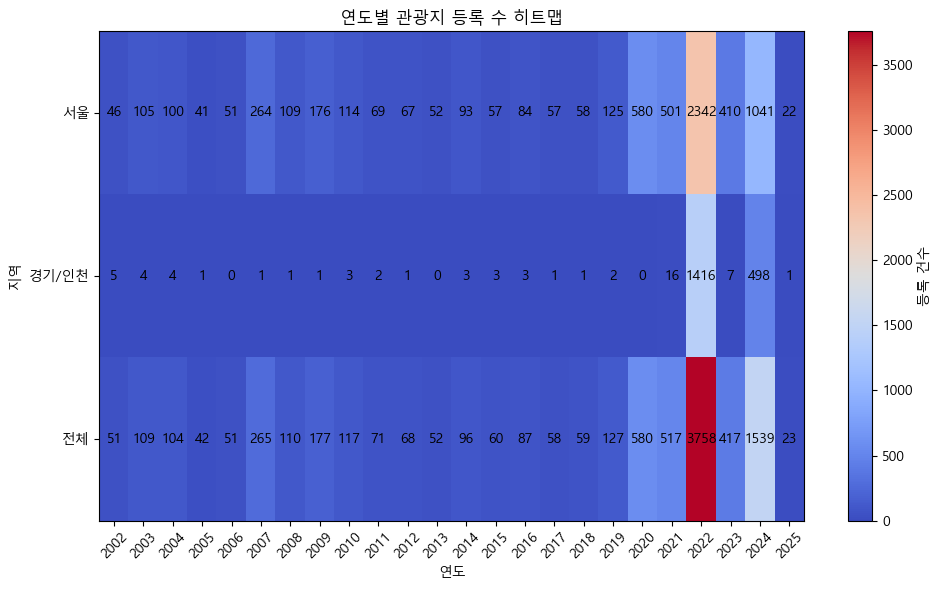

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 예시: counts_seoul, counts_gi, counts_total는 연도(예: 2019, 2020, ...)를 인덱스로 갖는 Series라고 가정합니다.
# 예)
# counts_seoul = pd.Series({2019: 50, 2020: 70, 2021: 60, 2022: 90})
# counts_gi = pd.Series({2019: 40, 2020: 65, 2021: 55, 2022: 85})
# counts_total = pd.Series({2019: 90, 2020: 135, 2021: 115, 2022: 175})

# 모든 연도 리스트 (세 Series의 인덱스 합집합)
years = sorted(set(counts_seoul.index.tolist() + counts_gi.index.tolist() + counts_total.index.tolist()))

# 각 시리즈를 전체 연도 리스트에 맞춰 재인덱싱 (없는 연도는 0으로 채움)
df_year_counts = pd.DataFrame({
    '서울': counts_seoul.reindex(years, fill_value=0),
    '경기/인천': counts_gi.reindex(years, fill_value=0),
    '전체': counts_total.reindex(years, fill_value=0)
}, index=years)

# 히트맵에서는 행이 지역, 열이 연도가 되도록 DataFrame 전치
data_heat = df_year_counts.T

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 히트맵 시각화
fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(data_heat, cmap='coolwarm', aspect='auto')

# x축: 연도 (열)
ax.set_xticks(np.arange(data_heat.shape[1]))
ax.set_xticklabels(data_heat.columns, rotation=45)
# y축: 지역 (행)
ax.set_yticks(np.arange(data_heat.shape[0]))
ax.set_yticklabels(data_heat.index)

# 각 셀 내부에 등록 건수 텍스트 표시
for i in range(data_heat.shape[0]):
    for j in range(data_heat.shape[1]):
        ax.text(j, i, data_heat.iloc[i, j], ha='center', va='center', color='black')

# 라벨 및 제목 설정
ax.set_xlabel("연도")
ax.set_ylabel("지역")
ax.set_title("연도별 관광지 등록 수 히트맵")

# 컬러바 추가
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("등록 건수")

plt.tight_layout()
plt.show()


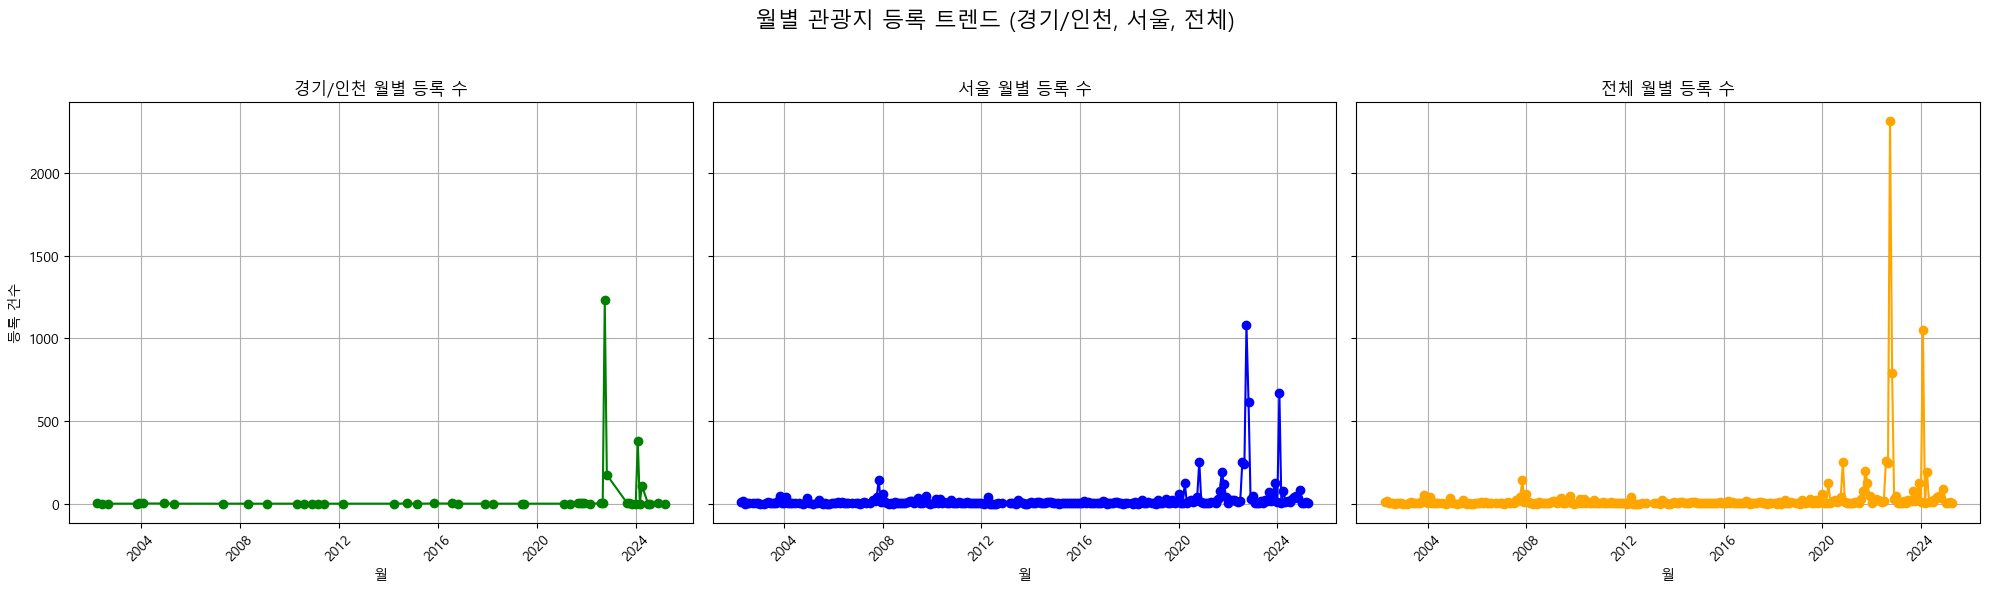

In [3]:
# 통합 데이터프레임 생성
df_all = pd.concat([df_seoul, df_gi], ignore_index=True)

# '월' 단위로 변환 (YYYY-MM)
df_seoul['월'] = df_seoul['등록일'].dt.to_period('M')
df_gi['월'] = df_gi['등록일'].dt.to_period('M')
df_all['월'] = df_all['등록일'].dt.to_period('M')

# 월별 등록 수 집계
monthly_seoul = df_seoul['월'].value_counts().sort_index()
monthly_gi = df_gi['월'].value_counts().sort_index()
monthly_all = df_all['월'].value_counts().sort_index()

# 시각화 설정
plt.rcParams['axes.unicode_minus'] = False
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# 경기/인천
axes[0].plot(monthly_gi.index.to_timestamp(), monthly_gi.values, marker='o', color='green')
axes[0].set_title('경기/인천 월별 등록 수')
axes[0].set_xlabel('월')
axes[0].set_ylabel('등록 건수')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# 서울
axes[1].plot(monthly_seoul.index.to_timestamp(), monthly_seoul.values, marker='o', color='blue')
axes[1].set_title('서울 월별 등록 수')
axes[1].set_xlabel('월')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# 전체
axes[2].plot(monthly_all.index.to_timestamp(), monthly_all.values, marker='o', color='orange')
axes[2].set_title('전체 월별 등록 수')
axes[2].set_xlabel('월')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True)

plt.suptitle('월별 관광지 등록 트렌드 (경기/인천, 서울, 전체)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

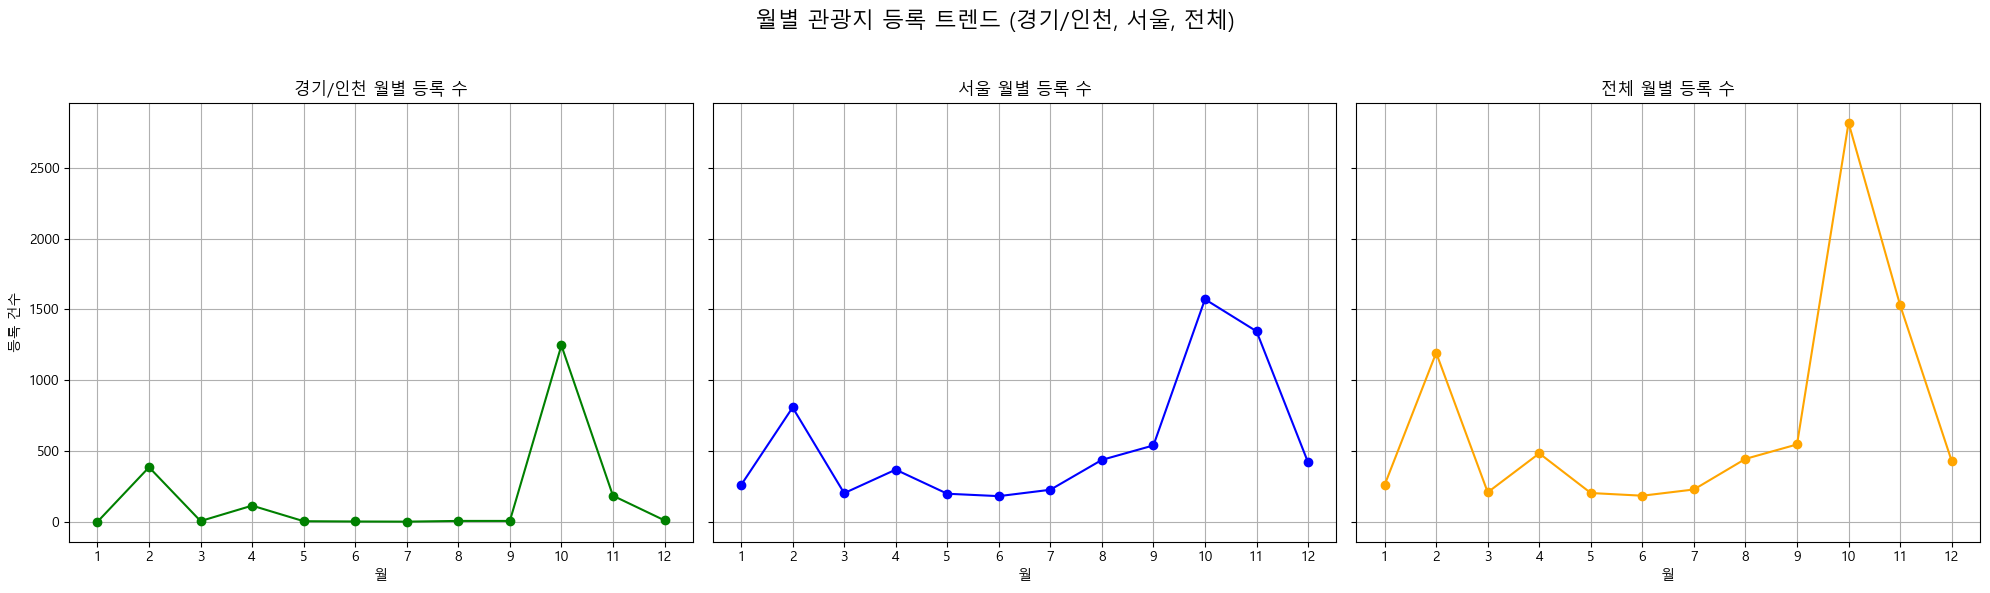

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 예시로 데이터프레임들이 이미 생성되어 있다고 가정 (df_seoul, df_gi)
# 통합 데이터프레임 생성
df_all = pd.concat([df_seoul, df_gi], ignore_index=True)

# '등록일'에서 월 정보 추출 (연도 무시)
df_seoul['month'] = df_seoul['등록일'].dt.month
df_gi['month'] = df_gi['등록일'].dt.month
df_all['month'] = df_all['등록일'].dt.month

# 월별 등록 건수 집계
# 그룹화 후 크기를 센 후, 1월부터 12월까지 인덱스를 맞추기 위해 reindex 사용 (해당 월에 데이터가 없으면 0 채움)
monthly_seoul = df_seoul.groupby('month').size().reindex(range(1, 13), fill_value=0)
monthly_gi = df_gi.groupby('month').size().reindex(range(1, 13), fill_value=0)
monthly_all = df_all.groupby('month').size().reindex(range(1, 13), fill_value=0)

# 시각화 설정
plt.rcParams['axes.unicode_minus'] = False  # 한글 사용 시 음수 부호 문제 방지
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# 경기/인천
axes[0].plot(monthly_gi.index, monthly_gi.values, marker='o', color='green')
axes[0].set_title('경기/인천 월별 등록 수')
axes[0].set_xlabel('월')
axes[0].set_ylabel('등록 건수')
axes[0].set_xticks(range(1, 13))
axes[0].grid(True)

# 서울
axes[1].plot(monthly_seoul.index, monthly_seoul.values, marker='o', color='blue')
axes[1].set_title('서울 월별 등록 수')
axes[1].set_xlabel('월')
axes[1].set_xticks(range(1, 13))
axes[1].grid(True)

# 전체
axes[2].plot(monthly_all.index, monthly_all.values, marker='o', color='orange')
axes[2].set_title('전체 월별 등록 수')
axes[2].set_xlabel('월')
axes[2].set_xticks(range(1, 13))
axes[2].grid(True)

plt.suptitle('월별 관광지 등록 트렌드 (경기/인천, 서울, 전체)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


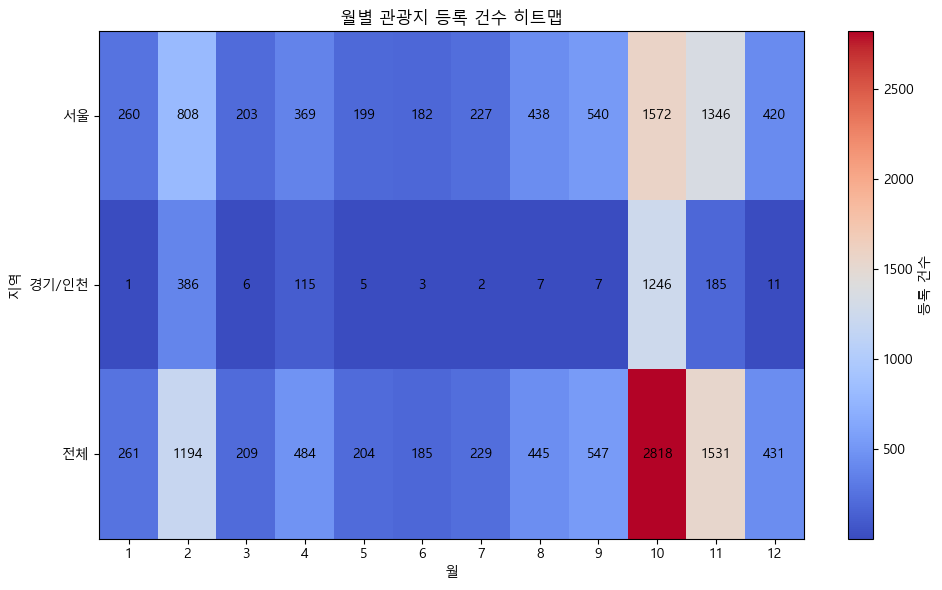

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# (이미 df_seoul, df_gi 데이터프레임과 월별 집계(월별 등록 건수) monthly_seoul, monthly_gi, monthly_all이 존재한다고 가정)
# 아래는 이전 코드에서 작성한 월별 집계 예시
# df_all = pd.concat([df_seoul, df_gi], ignore_index=True)
# df_seoul['month'] = df_seoul['등록일'].dt.month
# df_gi['month'] = df_gi['등록일'].dt.month
# df_all['month'] = df_all['등록일'].dt.month
#
# monthly_seoul = df_seoul.groupby('month').size().reindex(range(1, 13), fill_value=0)
# monthly_gi = df_gi.groupby('month').size().reindex(range(1, 13), fill_value=0)
# monthly_all = df_all.groupby('month').size().reindex(range(1, 13), fill_value=0)

# 위 월별 집계 결과를 사용해 DataFrame 생성 (인덱스: 1월~12월, 컬럼: 지역)
data = pd.DataFrame({
    '서울': monthly_seoul,
    '경기/인천': monthly_gi,
    '전체': monthly_all
})

# 히트맵에서는 y축에 지역, x축에 월을 표시하도록 DataFrame 전치
data_heat = data.T

# 히트맵 그리기
fig, ax = plt.subplots(figsize=(10, 6))
heatmap = ax.imshow(data_heat, cmap='coolwarm', aspect='auto')

# x축 (월) 설정: DataFrame의 컬럼은 1~12월
ax.set_xticks(np.arange(data_heat.shape[1]))
ax.set_xticklabels(data_heat.columns)
# y축 (지역) 설정
ax.set_yticks(np.arange(data_heat.shape[0]))
ax.set_yticklabels(data_heat.index)

# 각 셀에 등록 건수 텍스트 표시 (폰트 컬러는 필요에 따라 조절)
for i in range(data_heat.shape[0]):
    for j in range(data_heat.shape[1]):
        ax.text(j, i, data_heat.iloc[i, j], ha='center', va='center', color='black')

# 컬러바 추가
cbar = plt.colorbar(heatmap, ax=ax)
cbar.set_label('등록 건수')

# 제목과 축 라벨 설정
ax.set_title('월별 관광지 등록 건수 히트맵')
ax.set_xlabel('월')
ax.set_ylabel('지역')

plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns

heatmap_seoul = df_seoul.pivot_table(index='연도', columns='월', values='title', aggfunc='count').fillna(0)
heatmap_gi = df_gi.pivot_table(index='연도', columns='월', values='제목', aggfunc='count').fillna(0)
heatmap_all = df_all.pivot_table(index='연도', columns='월', values='제목', aggfunc='count').fillna(0)

# 히트맵 시각화 (가로로 3개)
plt.rcParams['font.family'] = 'Malgun Gothic'
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

sns.heatmap(heatmap_gi, ax=axes[0], cmap="YlGnBu", annot=True, fmt='.0f')
axes[0].set_title('경기/인천 월별 등록 수 히트맵')

sns.heatmap(heatmap_seoul, ax=axes[1], cmap="YlGnBu", annot=True, fmt='.0f')
axes[1].set_title('서울 월별 등록 수 히트맵')

sns.heatmap(heatmap_all, ax=axes[2], cmap="YlGnBu", annot=True, fmt='.0f')
axes[2].set_title('전체 월별 등록 수 히트맵')

plt.suptitle('관광지 월별 등록 트렌드 히트맵 (서울 / 경기·인천 / 전체)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()